In [5]:
#import library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
plt.style.use('fivethirtyeight')


In [6]:
#importing data set
df=pd.read_csv('C:/Users/PURUSHOTHAM REDDY/Desktop/US_Accidents_june20.csv')

In [6]:
#Description of dataset

df.head(5)

,ID,Source,TMC,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,MapQuest,201.0,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,NaN,NaN,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,MapQuest,201.0,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,NaN,NaN,...,False,False,False,False,False,False,Night,Night,Night,Day
2,A-3,MapQuest,201.0,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,NaN,NaN,...,False,False,False,False,True,False,Night,Night,Day,Day
3,A-4,MapQuest,201.0,3,2016-02-08 07:23:34,2016-02-08 07:53:34,39.747753,-84.205582,NaN,NaN,...,False,False,False,False,False,False,Night,Day,Day,Day
4,A-5,MapQuest,201.0,2,2016-02-08 07:39:07,2016-02-08 08:09:07,39.627781,-84.188354,NaN,NaN,...,False,False,False,False,True,False,Day,Day,Day,Day


In [7]:
#Description of dataset
print('Rows     :',df.shape[0])
print('Columns  :',df.shape[1])
print('\nFeatures :\n     :',df.columns.tolist())
print('\nMissing values    :',df.isnull().values.sum())
print('\nUnique values :  \n',df.nunique())

Rows     : 3513617
Columns  : 49

Features :
     : ['ID', 'Source', 'TMC', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat', 'Start_Lng', 'End_Lat', 'End_Lng', 'Distance(mi)', 'Description', 'Number', 'Street', 'Side', 'City', 'County', 'State', 'Zipcode', 'Country', 'Timezone', 'Airport_Code', 'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)', 'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction', 'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'Amenity', 'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway', 'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal', 'Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight', 'Astronomical_Twilight']

Missing values    : 13061803

Unique values :  
 ID                       3513617
Source                         3
TMC                           21
Severity                       4
Start_Time               3200042
End_Time                 3246120
Start_Lat                

In [8]:
#only categorical data
df.select_dtypes(exclude=['int','float']).columns

Index(['ID', 'Source', 'Severity', 'Start_Time', 'End_Time', 'Description',
       'Street', 'Side', 'City', 'County', 'State', 'Zipcode', 'Country',
       'Timezone', 'Airport_Code', 'Weather_Timestamp', 'Wind_Direction',
       'Weather_Condition', 'Amenity', 'Bump', 'Crossing', 'Give_Way',
       'Junction', 'No_Exit', 'Railway', 'Roundabout', 'Station', 'Stop',
       'Traffic_Calming', 'Traffic_Signal', 'Turning_Loop', 'Sunrise_Sunset',
       'Civil_Twilight', 'Nautical_Twilight', 'Astronomical_Twilight'],
      dtype='object')

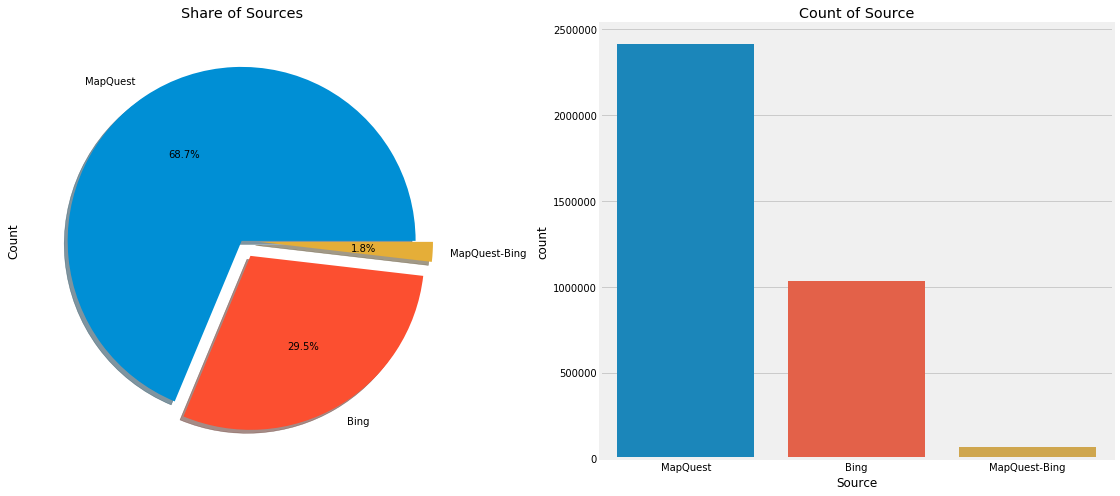

In [23]:
#the dataset is of streaming data from multiple data sources 
#finding the percentage of data from each source 
f,ax=plt.subplots(1,2,figsize=(18,8))#Create a figure and a set of subplots
df['Source'].value_counts().plot.pie(explode=[0,0.1,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('Share of Sources')
ax[0].set_ylabel('Count')
sns.countplot('Source',data=df,ax=ax[1],order=df['Source'].value_counts().index)#count number from each source
ax[1].set_title('Count of Source')
plt.show()

In [35]:
#count number of accidents 
#by year, by month, by week, by day(in hrs)

In [36]:
df['Month'] = df['Start_Time'].dt.month
df['Year'] = df['Start_Time'].dt.year
df['Hour'] = df['Start_Time'].dt.hour
df['Weekday'] = df['Start_Time'].dt.weekday
df['Impact'] = (df['End_Time'] - df['Start_Time']).dt.total_seconds()/60

In [38]:
# clean the data based on the condition that the impact on traffic is between zero-one week,and drop duplicates
oneweek = 60*24*7
df_clean = df[(df['Impact']>0) & (df['Impact']< oneweek)].drop_duplicates(subset=['Start_Time','End_Time','City','Street','Number','Description'])

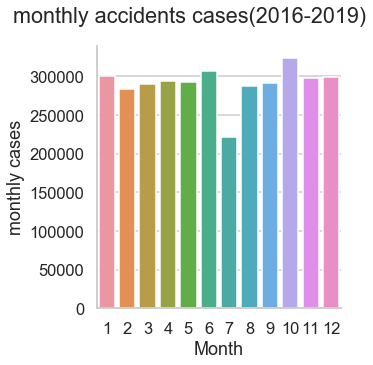

In [90]:
sns.set_context('talk')
m = sns.catplot(x='Month',data=df1[df1['Year'] <= 2020],kind='count')
m.fig.suptitle('monthly accidents cases(2016-2019)',y=1.03)
m.set(ylabel='monthly cases')
plt.show()
# there were more cases druing 8-12 compared to other months,excluding the data from 2020
# guess there are more bad weather conditions in the winter

In [44]:
df1 = df_clean[['Country','Start_Time','End_Time','Year','Month','Weekday','Hour','Impact','Severity']]

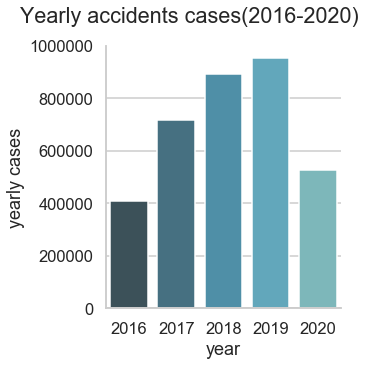

In [47]:
sns.set_style('whitegrid')
sns.set_context('talk')
sns.set_palette('GnBu_d')
a = sns.catplot(x='Year',data=df_clean[df_clean['Year'] <= 2020],kind='count')
a.fig.suptitle('Yearly accidents cases(2016-2020)',y=1.03)
a.set(ylabel='yearly cases',xlabel='year')
plt.show()
# there is a growing trend of year accidents cases

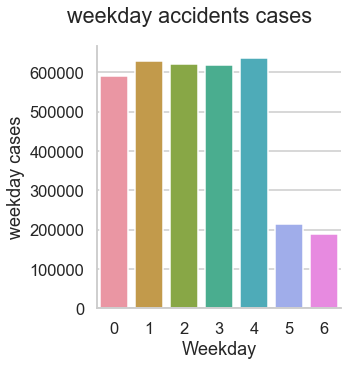

In [45]:
sns.set_context('talk')
w = sns.catplot(x='Weekday',data=df1,kind='count')
w.fig.suptitle('weekday accidents cases',y=1.03)
w.set(ylabel='weekday cases')
plt.show()
# accidents cases on working day is much larger then those on weekend, as less people go out to work

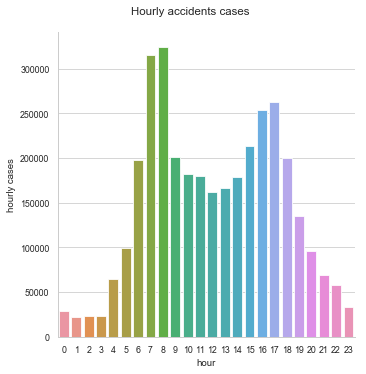

In [89]:

sns.set_context('paper')
h = sns.catplot(x='Hour',data=df1,kind='count')
h.fig.suptitle('Hourly accidents cases',y=1.03)
h.set(ylabel='hourly cases',xlabel='hour')

plt.show()
# most accidents happend during the day time, and there are two peaks on 7-8 and 16-17 when people are on commute 
# between workplace and home
# during 23 to 3 o'clock，before dawn.cases numbers are relatively at the bottom level as most people are in sleep

In [48]:
df['Start_Time'] = pd.to_datetime(df['Start_Time'], format="%Y/%m/%d %H:%M:%S")
df['DayOfWeekNum'] = df['Start_Time'].dt.dayofweek
df['DayOfWeek'] = df['Start_Time'].dt.weekday_name
df['MonthDayNum'] = df['Start_Time'].dt.day
df['HourOfDay'] = df['Start_Time'].dt.hour

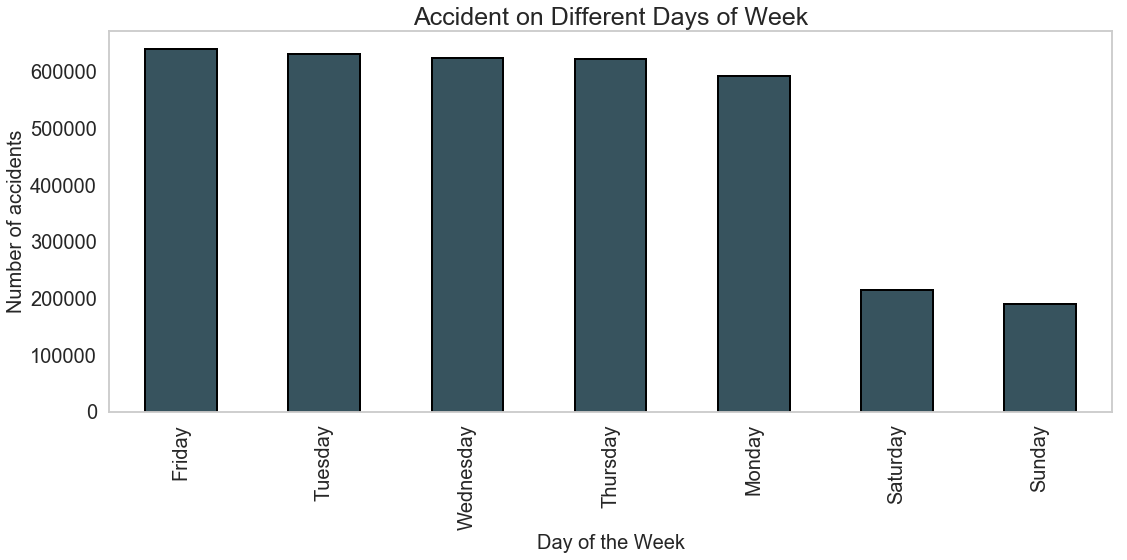

In [49]:
fig, ax=plt.subplots(figsize=(16,7))
df['DayOfWeek'].value_counts(ascending=False).plot.bar(width=0.5,edgecolor='k',align='center',linewidth=2)
plt.xlabel('Day of the Week',fontsize=20)
plt.ylabel('Number of accidents',fontsize=20)
ax.tick_params(labelsize=20)
plt.title('Accident on Different Days of Week',fontsize=25)
plt.grid()
plt.ioff()

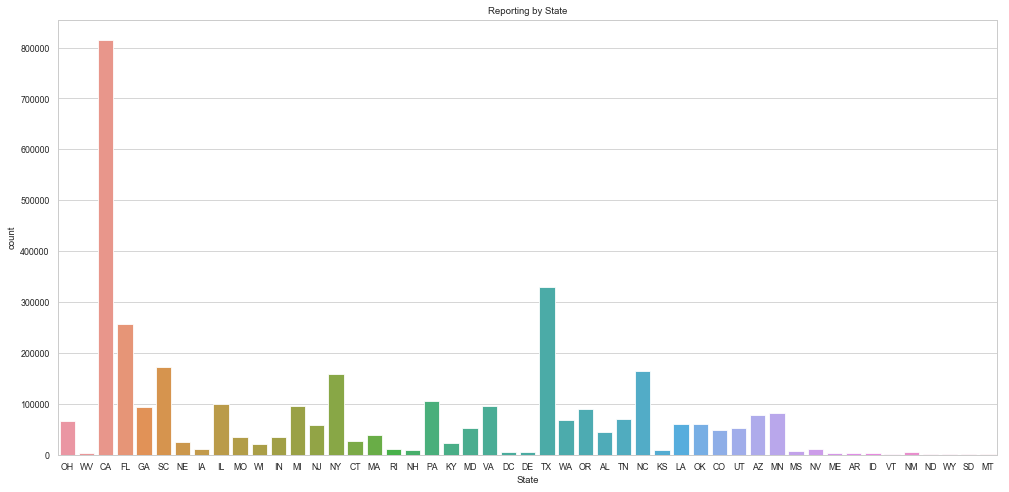

In [65]:
fig, ax = plt.subplots(figsize = (15,8))
sns.set_context("paper")
g = sns.countplot(x = "State", data = df_clean, ax = ax)
g.set_title("Reporting by State")
plt.show()
#california and Texas have most accident rates

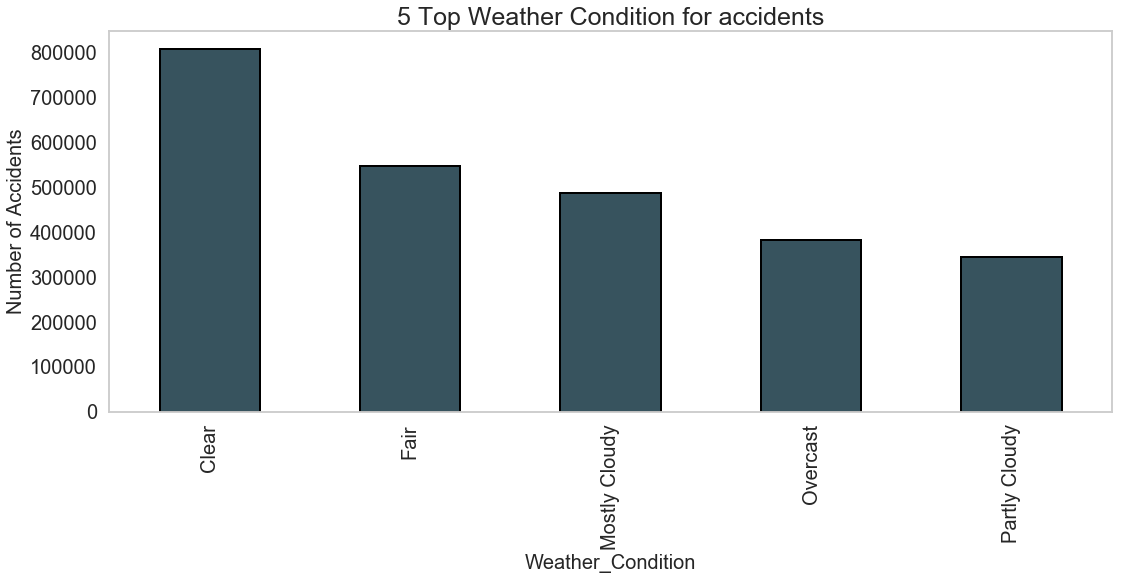

In [102]:
fig, ax=plt.subplots(figsize=(16,7))
df['Weather_Condition'].value_counts().sort_values(ascending=False).head(5).plot.bar(width=0.5,edgecolor='k',align='center',linewidth=2)
plt.xlabel('Weather_Condition',fontsize=20)
plt.ylabel('Number of Accidents',fontsize=20)
ax.tick_params(labelsize=20)
plt.title('5 Top Weather Condition for accidents',fontsize=25)
plt.grid()
plt.ioff()

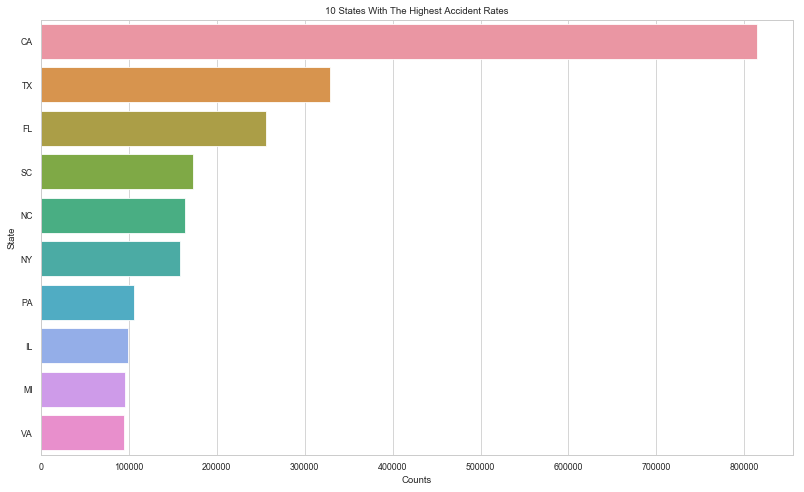

In [67]:
#10 states with the highest accident rates
df_st = df_clean.groupby('State').size().to_frame('Counts')
df_st = df_st.reset_index().sort_values('Counts', ascending = False)[:10]

fig, ax = plt.subplots(figsize = (12,8))
b = sns.barplot(y = 'State',x = 'Counts', data = df_st )

b.set_title("10 States With The Highest Accident Rates")

plt.show()
# these states are consistent with the states with largest population in the U.S.

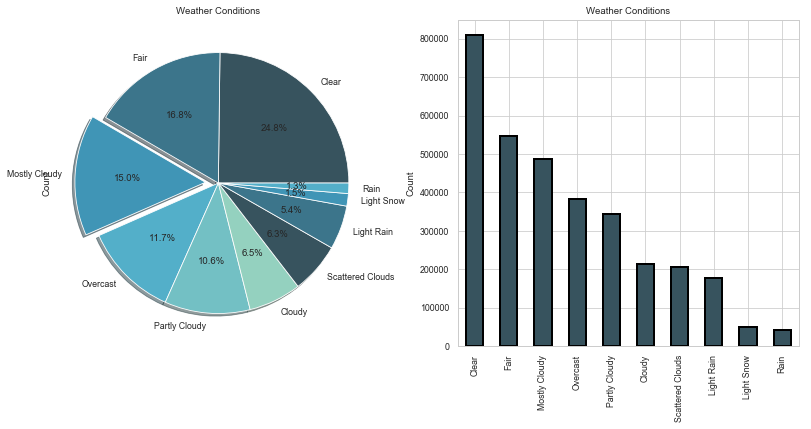

In [72]:
# Top 10 Accident conditions
f,ax=plt.subplots(1,2,figsize=(12,6))
df_top_weather_conditions = df.groupby('Weather_Condition').size().sort_values(ascending=False).iloc[:10]
df_top_weather_conditions.plot.pie(explode=[0,0,0.1,0,0,0,0,0,0,0],ax=ax[0],autopct='%1.1f%%',shadow=True)
ax[0].set_title('Weather Conditions')
ax[0].set_ylabel('Count')
df['Weather_Condition'].value_counts().sort_values(ascending=False).head(10).plot.bar(width=0.5,ax=ax[1],edgecolor='k',align='center',linewidth=2)
ax[1].set_title('Weather Conditions')
ax[1].set_ylabel('Count')
plt.show()


In [73]:
# This table shows the number of accidents for each conditions
pd.DataFrame(df_top_weather_conditions) 

,0
Weather_Condition,
Clear,808202
Fair,547721
Mostly Cloudy,488094
Overcast,382485
Partly Cloudy,344815
Cloudy,212878
Scattered Clouds,204660
Light Rain,176942
Light Snow,50435


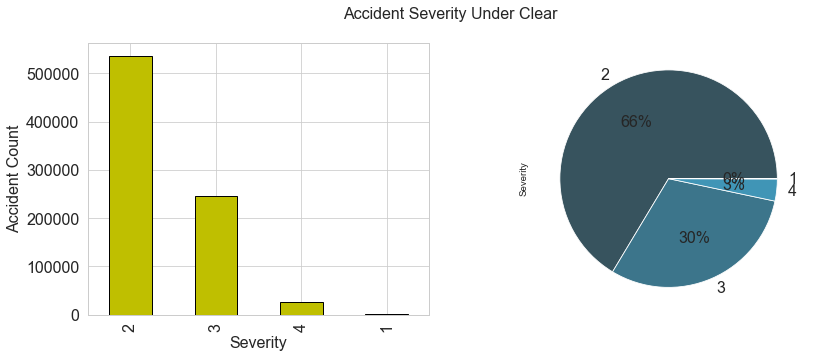

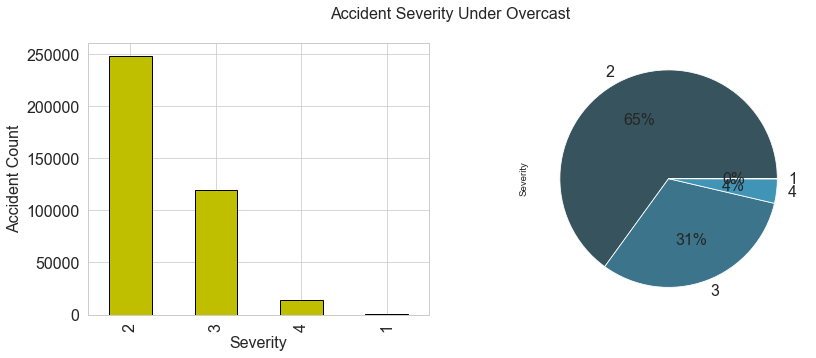

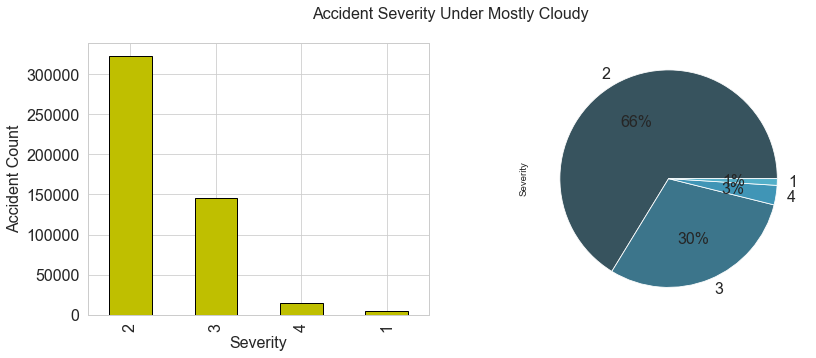

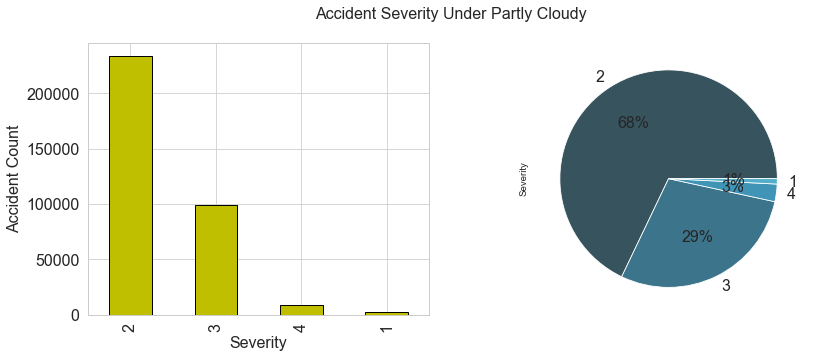

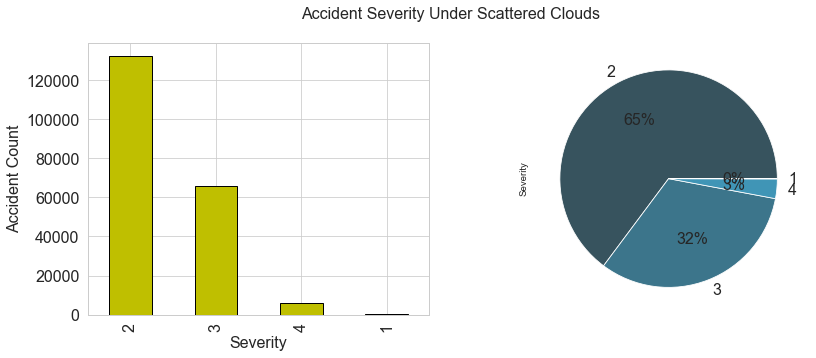

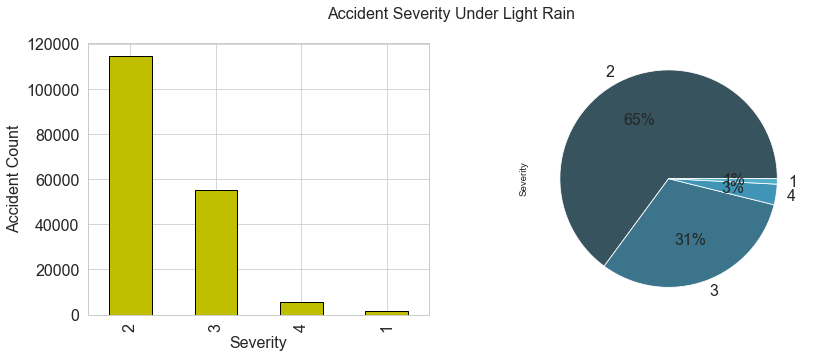

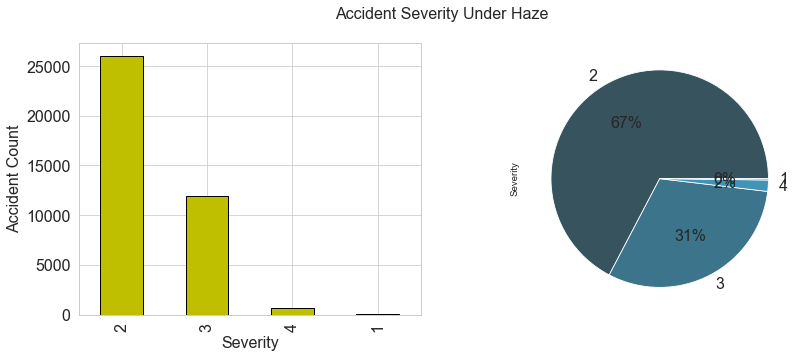

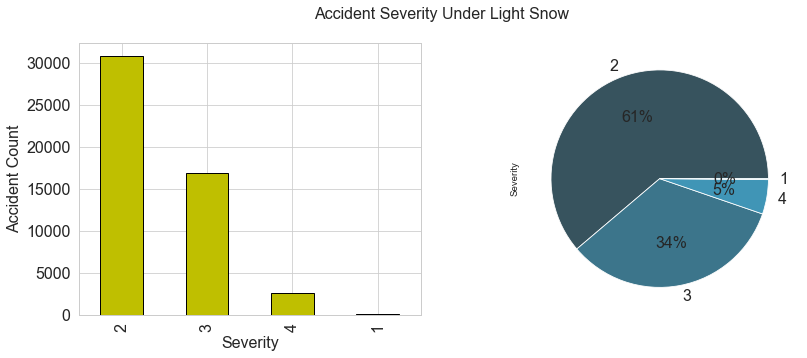

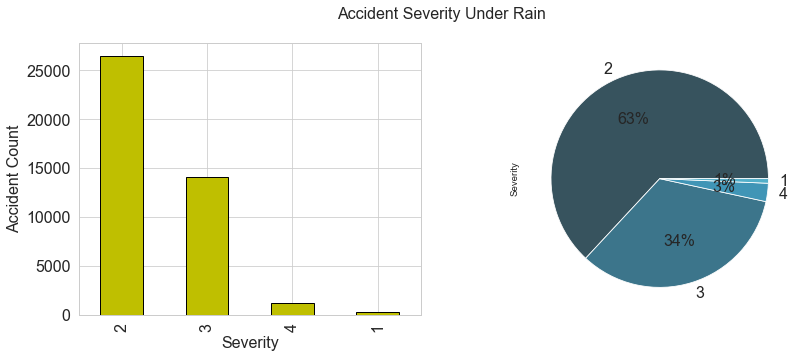

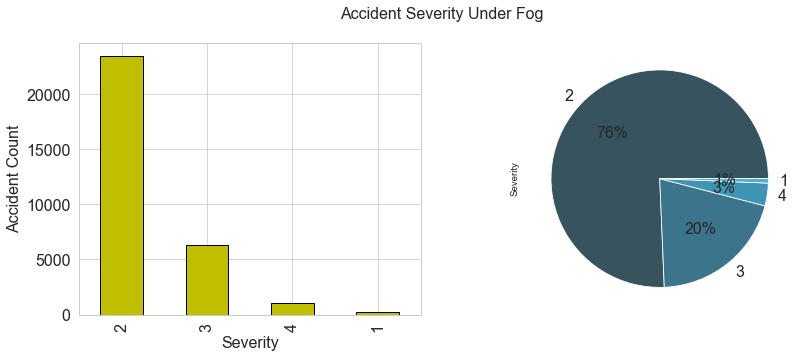

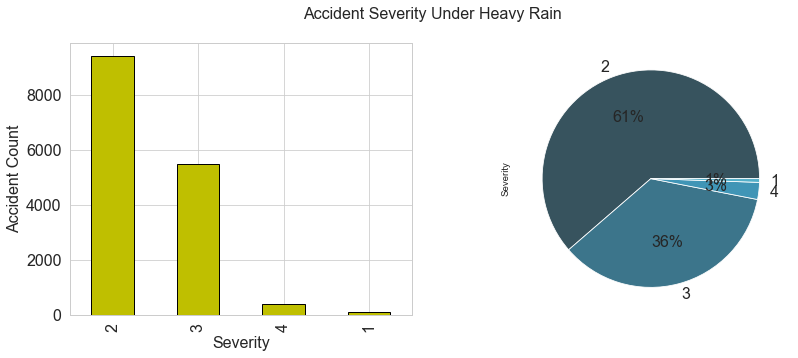

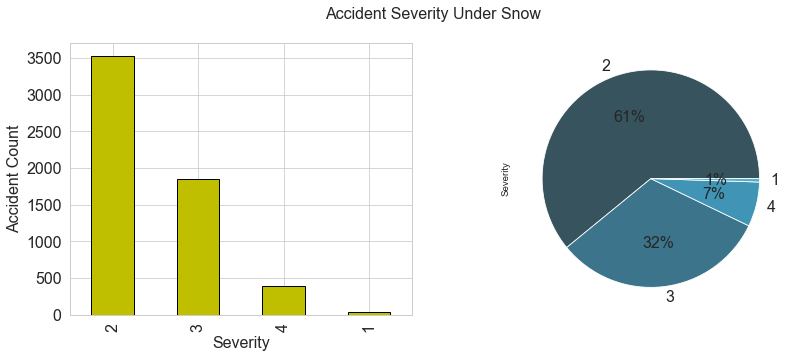

In [74]:
# We will perform a for loop to plot one pieplot and one bar plot for each conditions
for s in ["Clear","Overcast","Mostly Cloudy","Partly Cloudy","Scattered Clouds","Light Rain","Haze","Light Snow","Rain","Fog","Heavy Rain","Snow"]:
    plt.subplots(1,2,figsize=(12,5))
    plt.suptitle('Accident Severity Under ' + s,fontsize=16)
    plt.subplot(1,2,1)
    df.loc[df["Weather_Condition"] == s]['Severity'].value_counts().plot.bar(width=0.5,color='y',edgecolor='k',align='center',linewidth=1)
    plt.xlabel('Severity',fontsize=16)
    plt.ylabel('Accident Count',fontsize=16)
    plt.xticks(fontsize=16)
    plt.yticks(fontsize=16)
    plt.subplot(1,2,2)
    df.loc[df["Weather_Condition"] == s]['Severity'].value_counts().plot.pie(autopct='%1.0f%%',fontsize=16)

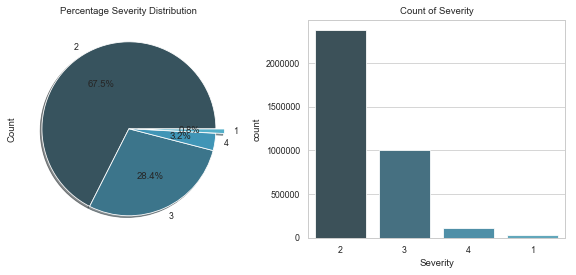

In [79]:
# Percent of severity
f,ax=plt.subplots(1,2,figsize=(9,4))
df['Severity'].value_counts().plot.pie(explode=[0,0,0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('Percentage Severity Distribution')
ax[0].set_ylabel('Count')
sns.countplot('Severity',data=df,ax=ax[1],order=df['Severity'].value_counts().index)
ax[1].set_title('Count of Severity')
plt.show()

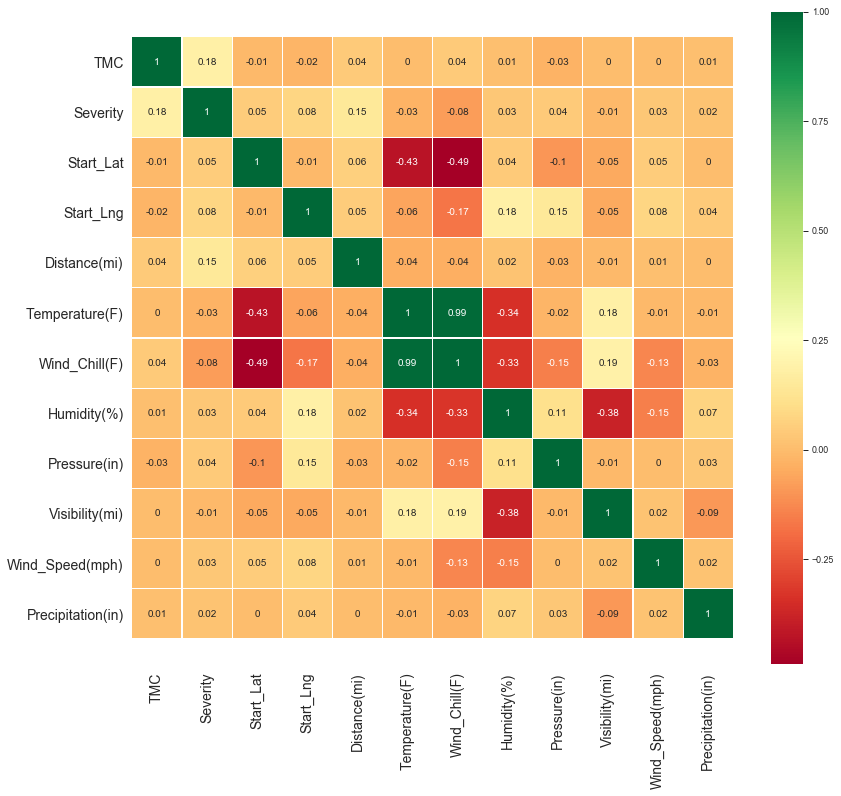

In [80]:
# Now we will make a HeatMap by using Seaborn Library
fig=sns.heatmap(df[['TMC','Severity','Start_Lat','Start_Lng','Distance(mi)','Temperature(F)','Wind_Chill(F)','Humidity(%)','Pressure(in)','Visibility(mi)','Wind_Speed(mph)','Precipitation(in)']].corr().round(2),annot=True,cmap='RdYlGn',linewidths=0.2,annot_kws={'size':10})
# Seaborn Heatmap cuts the top and bottom rows to half,to fix the error, y_lims are changed
bottom, top = fig.get_ylim()
fig.set_ylim(bottom + 0.5, top - 0.5)
fig=plt.gcf()
fig.set_size_inches(12,12)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

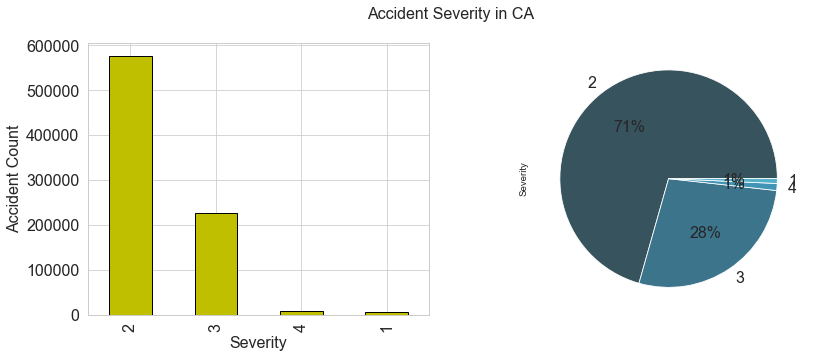

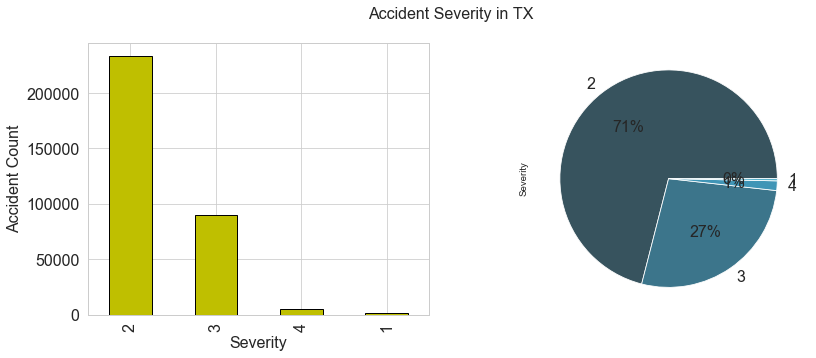

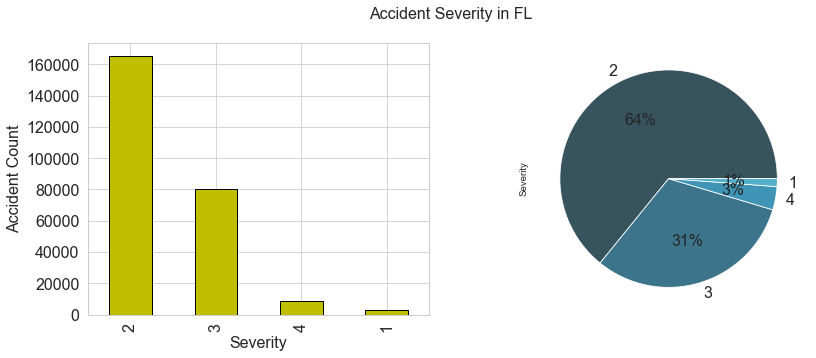

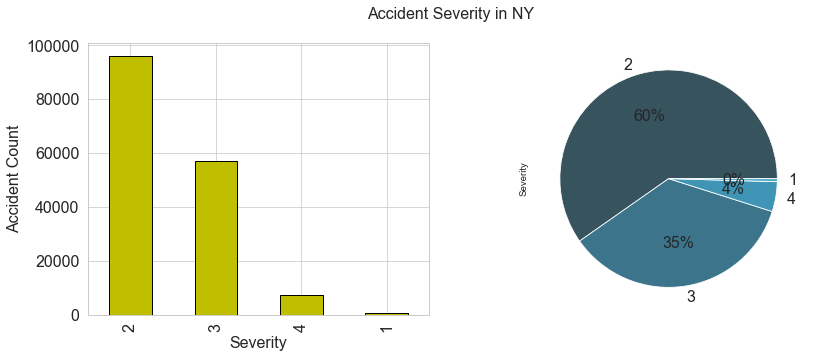

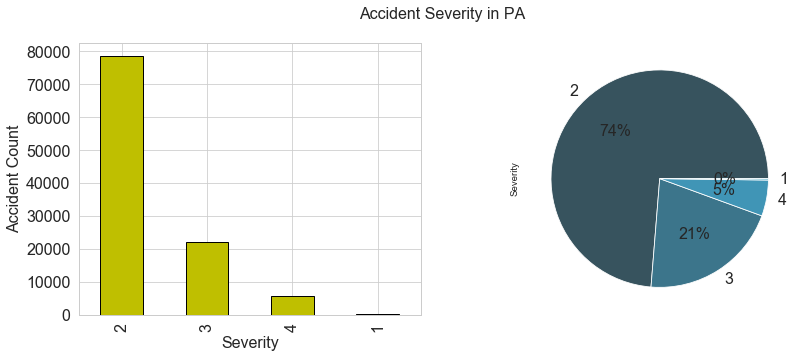

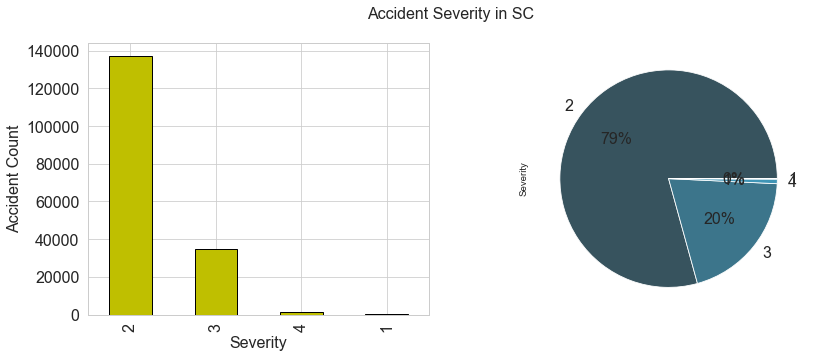

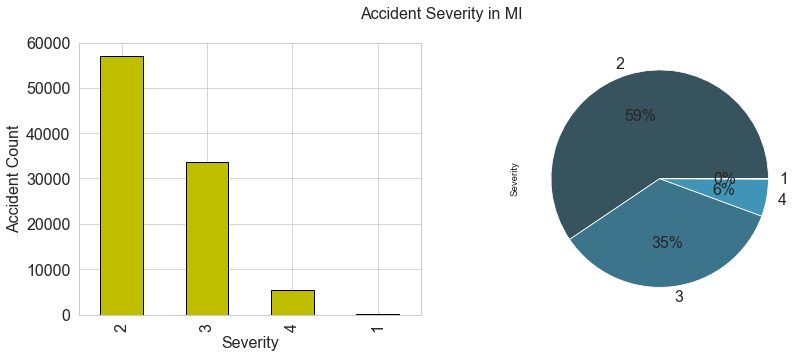

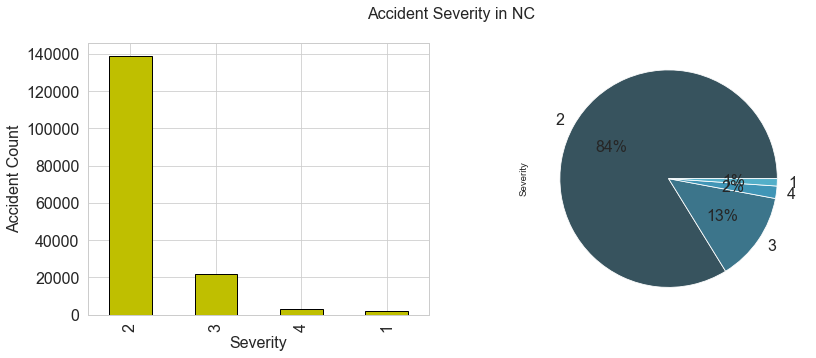

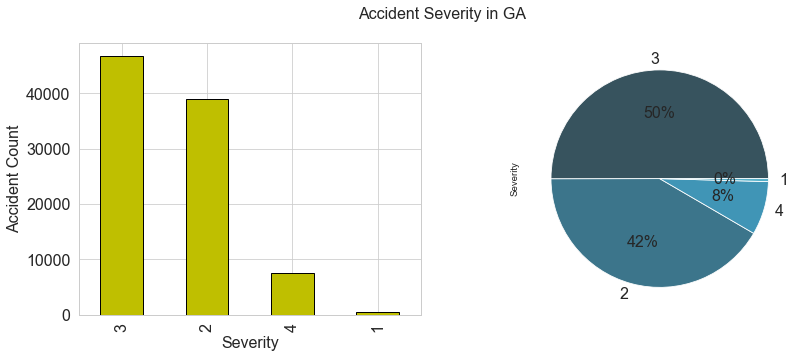

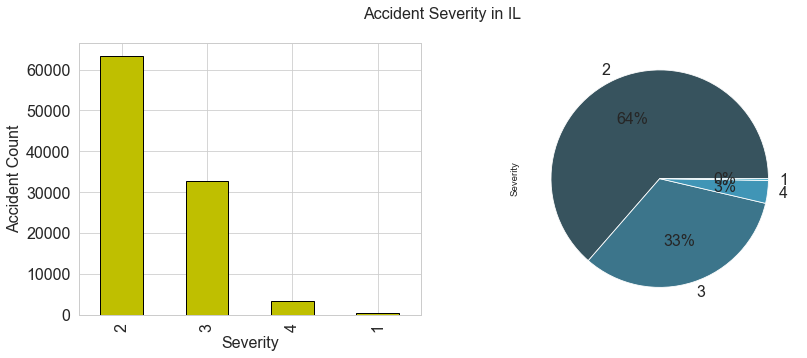

In [81]:
# We will draw pieplots and barplots for the distributions of severities in each of these 10 states.
# We will perform a for loop to choose the date for these states
for s in ["CA","TX", "FL","NY","PA","SC", "MI","NC","GA","IL"]:
    plt.subplots(1,2,figsize=(12,5))
    plt.suptitle('Accident Severity in ' + s,fontsize=16)
    plt.subplot(1,2,1)
    df.loc[df["State"] == s]['Severity'].value_counts().plot.bar(width=0.5,color='y',edgecolor='k',align='center',linewidth=1)
    plt.xlabel('Severity',fontsize=16)
    plt.ylabel('Accident Count',fontsize=16)
    plt.xticks(fontsize=16)
    plt.yticks(fontsize=16)
    plt.subplot(1,2,2)
    df.loc[df["State"] == s]['Severity'].value_counts().plot.pie(autopct='%1.0f%%',fontsize=16)

In [83]:
bool_cols = [col for col in df.columns if df[col].dtype ==np.dtype('bool')]
booldf = df[bool_cols]
not_one_hot = booldf[booldf.sum(axis=1) > 1]
print('There are {} non one hot metadata rows, which are {:.1f}% of the data'.format(len(not_one_hot),100*len(not_one_hot)/len(df)))

There are 284711 non one hot metadata rows, which are 8.1% of the data


In [84]:
bools = booldf.sum(axis=0)

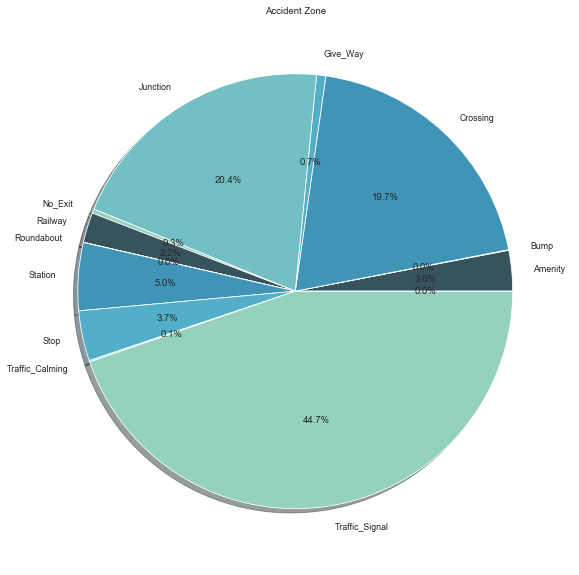

In [87]:
bools.plot.pie(autopct='%1.1f%%',shadow=True,figsize=(10,10))
plt.ylabel('')
plt.title('Accident Zone');

In [94]:
accidents = df[['Start_Time','End_Time','State','City', 'County', 'Zipcode','Severity','Weather_Condition','Amenity', 'Bump', 'Crossing',
       'Give_Way', 'Junction', 'No_Exit', 'Railway', 'Roundabout', 'Station',
       'Stop', 'Traffic_Calming', 'Traffic_Signal', 'Turning_Loop','Sunrise_Sunset']]

In [101]:
accidents['Start_Time'] = pd.to_datetime(accidents['Start_Time'])
accidents['End_Time'] = pd.to_datetime(accidents['End_Time'])

accidentsCA = accidents[accidents["State"] == 'CA']
accidentsCA['City'].value_counts().head(15)
top15CA = pd.DataFrame(accidentsCA['City'].value_counts().head(15))

C:\Users\PURUSHOTHAM REDDY\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\PURUSHOTHAM REDDY\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


Text(0.5, 1.0, 'Top 15 California Cities for Traffic Accidents')

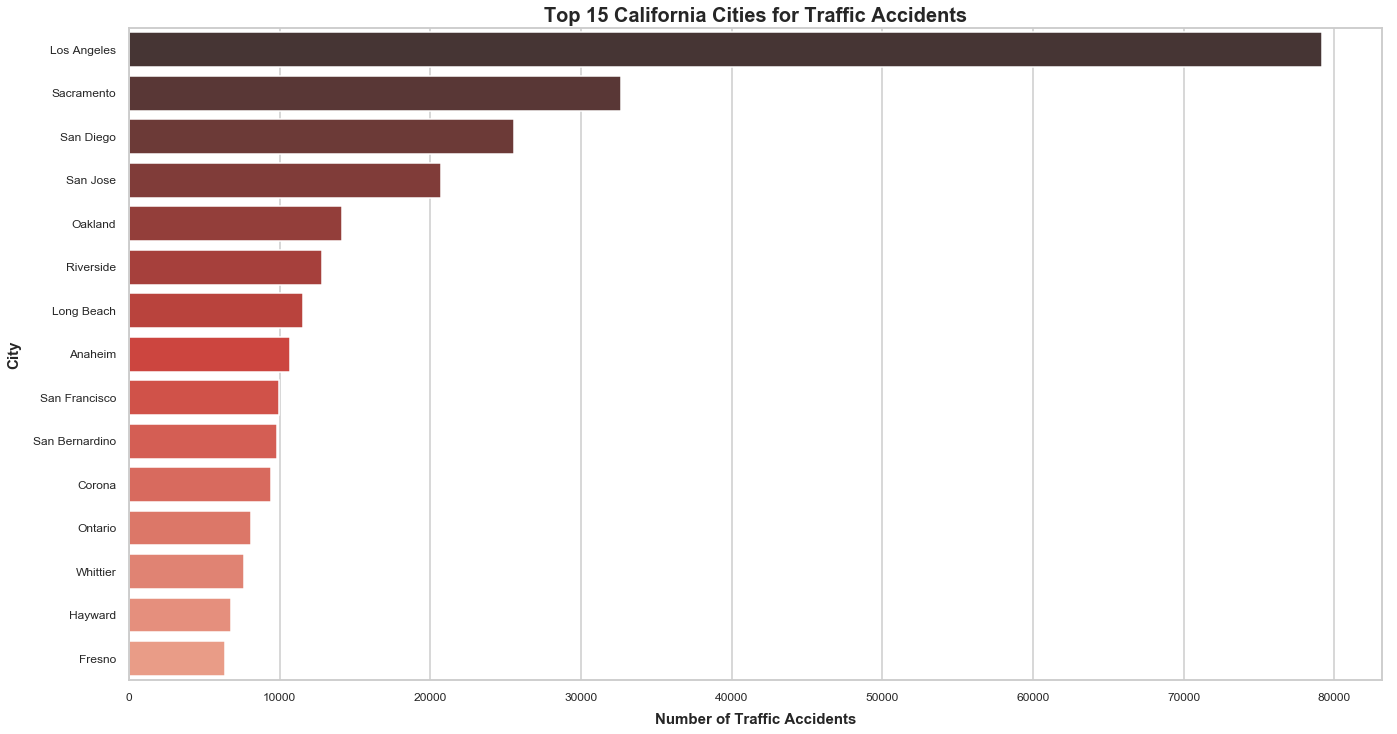

In [96]:
plt.figure(figsize=(20,12))
sns.barplot(top15CA['City'],top15CA.index,palette="Reds_d")
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel("Number of Traffic Accidents", labelpad = 10, fontsize=15,weight='bold')
plt.ylabel("City", labelpad = 12,fontsize=15, weight='bold')
plt.title("Top 15 California Cities for Traffic Accidents", fontsize=20,weight='bold')

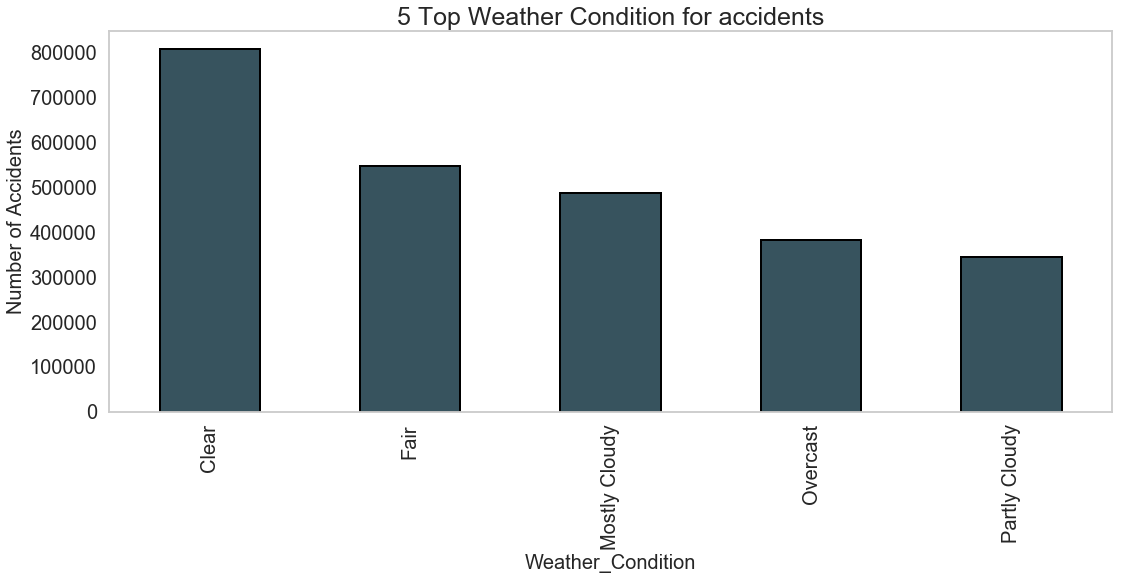

In [103]:
fig, ax=plt.subplots(figsize=(16,7))
df['Weather_Condition'].value_counts().sort_values(ascending=False).head(5).plot.bar(width=0.5,edgecolor='k',align='center',linewidth=2)
plt.xlabel('Weather_Condition',fontsize=20)
plt.ylabel('Number of Accidents',fontsize=20)
ax.tick_params(labelsize=20)
plt.title('5 Top Weather Condition for accidents',fontsize=25)
plt.grid()
plt.ioff()

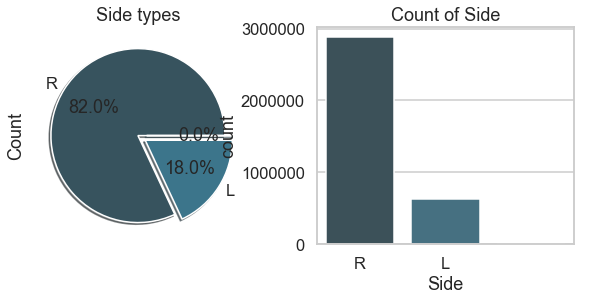

In [104]:
# Percent of Side Types
f,ax=plt.subplots(1,2,figsize=(9,4))
df['Side'].value_counts().plot.pie(explode=[0,0.1,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('Side types')
ax[0].set_ylabel('Count')
sns.countplot('Side',data=df,ax=ax[1],order=df['Side'].value_counts().index)
ax[1].set_title('Count of Side')
plt.show()

In [ ]:
#model building

In [2]:
 #Import KNeighborsClassifier from sklearn.neighbors
from sklearn.neighbors import KNeighborsClassifier

# Import DecisionTreeClassifier from sklearn.tree
from sklearn.tree import DecisionTreeClassifier

from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, auc

In [7]:
df.isna().sum() #returns the number of missing values in each column

Source                         0
TMC                      1034799
Severity                       0
Start_Time                     0
End_Time                       0
Start_Lat                      0
Start_Lng                      0
End_Lat                  2478818
End_Lng                  2478818
Distance(mi)                   0
Description                    1
Number                   2262864
Street                         0
Side                           0
City                         112
County                         0
State                          0
Zipcode                     1069
Country                        0
Timezone                    3880
Airport_Code                6758
Weather_Timestamp          43323
Temperature(F)             65732
Wind_Chill(F)            1868249
Humidity(%)                69687
Pressure(in)               55882
Visibility(mi)             75856
Wind_Direction             58874
Wind_Speed(mph)           454609
Precipitation(in)        2025874
Weather_Co

In [9]:
#to drop if any value in the row has a nan
df_na= df.drop(['End_Lat', 'End_Lng','Number','Wind_Chill(F)','Precipitation(in)','Description','Street', 'Source'],axis =1)

df_nona=df_na.dropna(axis=0)

In [10]:

df_nona.isna().sum()

TMC                      0
Severity                 0
Start_Time               0
End_Time                 0
Start_Lat                0
Start_Lng                0
Distance(mi)             0
Side                     0
City                     0
County                   0
State                    0
Zipcode                  0
Country                  0
Timezone                 0
Airport_Code             0
Weather_Timestamp        0
Temperature(F)           0
Humidity(%)              0
Pressure(in)             0
Visibility(mi)           0
Wind_Direction           0
Wind_Speed(mph)          0
Weather_Condition        0
Amenity                  0
Bump                     0
Crossing                 0
Give_Way                 0
Junction                 0
No_Exit                  0
Railway                  0
Roundabout               0
Station                  0
Stop                     0
Traffic_Calming          0
Traffic_Signal           0
Turning_Loop             0
Sunrise_Sunset           0
C

In [11]:
df_nona.isna().sum()

TMC                      0
Severity                 0
Start_Time               0
End_Time                 0
Start_Lat                0
Start_Lng                0
Distance(mi)             0
Side                     0
City                     0
County                   0
State                    0
Zipcode                  0
Country                  0
Timezone                 0
Airport_Code             0
Weather_Timestamp        0
Temperature(F)           0
Humidity(%)              0
Pressure(in)             0
Visibility(mi)           0
Wind_Direction           0
Wind_Speed(mph)          0
Weather_Condition        0
Amenity                  0
Bump                     0
Crossing                 0
Give_Way                 0
Junction                 0
No_Exit                  0
Railway                  0
Roundabout               0
Station                  0
Stop                     0
Traffic_Calming          0
Traffic_Signal           0
Turning_Loop             0
Sunrise_Sunset           0
C

In [12]:
df_nona.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2113655 entries, A-3 to A-2478858
Data columns (total 40 columns):
TMC                      float64
Severity                 int64
Start_Time               datetime64[ns]
End_Time                 datetime64[ns]
Start_Lat                float64
Start_Lng                float64
Distance(mi)             float64
Side                     object
City                     object
County                   object
State                    object
Zipcode                  object
Country                  object
Timezone                 object
Airport_Code             object
Weather_Timestamp        object
Temperature(F)           float64
Humidity(%)              float64
Pressure(in)             float64
Visibility(mi)           float64
Wind_Direction           object
Wind_Speed(mph)          float64
Weather_Condition        object
Amenity                  bool
Bump                     bool
Crossing                 bool
Give_Way                 bool
Junction

In [13]:
#list of features included in Machine Learning

feature_lst=['TMC','Severity','Distance(mi)','Side','City','County','State','Timezone','Temperature(F)','Humidity(%)','Pressure(in)', 'Visibility(mi)', 'Wind_Direction','Weather_Condition','Amenity','Bump','Crossing','Give_Way','Junction','No_Exit','Railway','Roundabout','Station','Stop','Traffic_Calming','Traffic_Signal','Turning_Loop','Sunrise_Sunset','Hour','Weekday', 'Time_Duration(min)']

In [17]:
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder 
le = LabelEncoder() 
df_nona['Side']= le.fit_transform(df_nona['Side']) 
df_nona['City']= le.fit_transform(df_nona['City'])
df_nona['County']= le.fit_transform(df_nona['County'])
df_nona['State']= le.fit_transform(df_nona['State'])
df_nona['Zipcode']= le.fit_transform(df_nona['Zipcode'])
df_nona['Country']= le.fit_transform(df_nona['Country'])
df_nona['Timezone']= le.fit_transform(df_nona['Timezone'])
df_nona['Airport_Code']= le.fit_transform(df_nona['Airport_Code'])
df_nona['Wind_Direction']= le.fit_transform(df_nona['Wind_Direction'])
df_nona['Civil_Twilight']= le.fit_transform(df_nona['Civil_Twilight'])
df_nona['Sunrise_Sunset']= le.fit_transform(df_nona['Sunrise_Sunset'])
df_nona['Weather_Condition']= le.fit_transform(df_nona['Weather_Condition'])
df_nona['Nautical_Twilight']= le.fit_transform(df_nona['Nautical_Twilight'])
df_nona['Astronomical_Twilight']= le.fit_transform(df_nona['Astronomical_Twilight'])

df_nona['Start_Time']= le.fit_transform(df_nona['Start_Time'])
df_nona['End_Time']= le.fit_transform(df_nona['End_Time'])
df_nona['Weather_Timestamp']= le.fit_transform(df_nona['Weather_Timestamp'])

C:\Users\PURUSHOTHAM REDDY\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
C:\Users\PURUSHOTHAM REDDY\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
C:\Users\PURUSHOTHAM REDDY\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the 

In [18]:
df=df_nona

# Set the target for the prediction
target='Severity'


# Create arrays for the features and the response variable

# set X and y
y = df[target]
X = df.drop(target, axis=1)

# Split the data set into training and testing data sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=21, stratify=y)

In [19]:
#algo_lst=[ 'K-Nearest Neighbors','Decision Trees']



In [21]:
knn = KNeighborsClassifier(n_neighbors=6)

# Fit the classifier to the data
knn.fit(X_train,y_train)

# Predict the labels for the training data X
y_pred = knn.predict(X_test)

# Get the accuracy score
acc=accuracy_score(y_test, y_pred)

print('[K-Nearest Neighbors (KNN)] knn.score: {:.3f}.'.format(knn.score(X_test, y_test)))
print('[K-Nearest Neighbors (KNN)] accuracy_score: {:.3f}.'.format(acc))


from sklearn import metrics
f1_knn=metrics.f1_score(y_pred,y_test,average='weighted')
print('[KNN Model -] F1_Score: {:.3f}.'.format(f1_knn))

[K-Nearest Neighbors (KNN)] knn.score: 0.718.
[K-Nearest Neighbors (KNN)] accuracy_score: 0.718.
[KNN Model -] F1_Score: 0.738.
